<a href="https://colab.research.google.com/github/Applejack2004/My_first_neuronet/blob/main/%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BA%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #правильные ответы в у
x_train = x_train / 255 #разделение на оттенки серого
x_test = x_test / 255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train_categ=keras.utils.to_categorical(y_train,10)
y_test_categ=keras.utils.to_categorical(y_test,10)

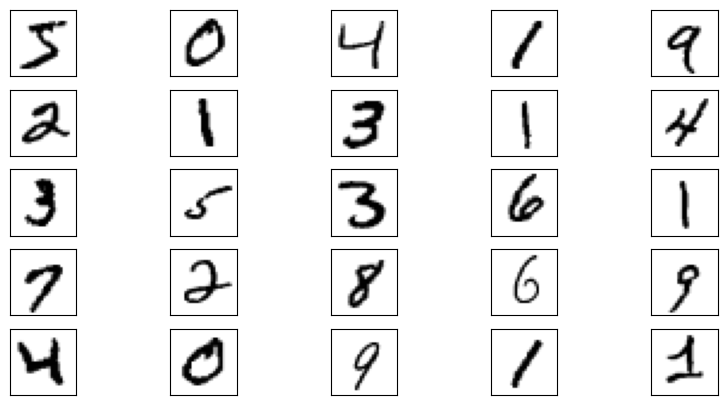

In [ ]:
#отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
plt.show()




In [ ]:
model=keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])
print(model.summary()) #вывод структуры нс в консоль

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


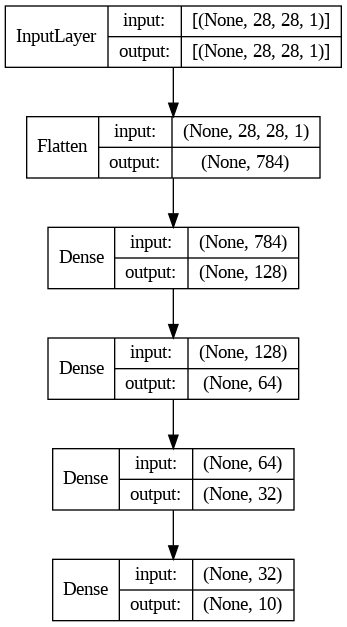

In [ ]:
keras.utils.plot_model(model,to_file='mdel_plot.png',show_shapes=True,show_layer_names=False)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
log=model.fit(x_train,y_train_categ,batch_size=32,epochs=8,validation_split=0.20)

Epoch 1/8
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2740 - accuracy: 0.9176 - val_loss: 0.1393 - val_accuracy: 0.9595
Epoch 2/8
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1140 - accuracy: 0.9650 - val_loss: 0.1063 - val_accuracy: 0.9673
Epoch 3/8
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0771 - accuracy: 0.9761 - val_loss: 0.0996 - val_accuracy: 0.9713
Epoch 4/8
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0610 - accuracy: 0.9803 - val_loss: 0.0926 - val_accuracy: 0.9743
Epoch 5/8
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0473 - accuracy: 0.9851 - val_loss: 0.0951 - val_accuracy: 0.9730
Epoch 6/8
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.1021 - val_accuracy: 0.9720
Epoch 7/8
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.1012 - val_accuracy: 0.9730

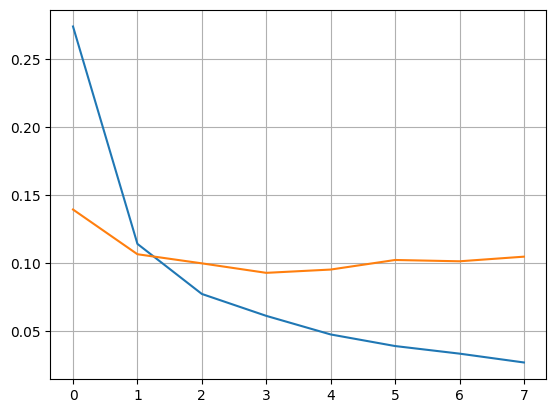

In [ ]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 19ms/step
[[0.11195812 0.13123067 0.10671094 0.12799829 0.11365058 0.06783071
  0.06864405 0.09696703 0.10398637 0.07102324]]
1


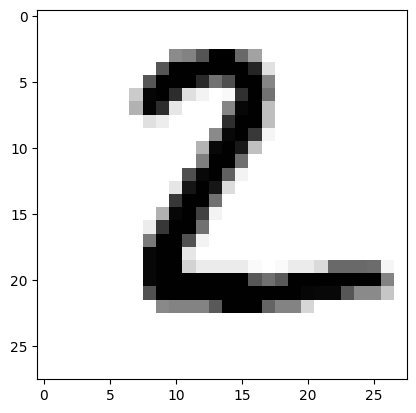

In [ ]:
#выберем 7 по пордяку значение и попытаемся его распознать
n=1

x=np.expand_dims(x_test[n],axis=0)
res=model.predict(x)
print (res)
print (np.argmax(res))
plt.imshow(x_test[n],cmap=plt.cm.binary)
plt.show()